In [11]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.io import loadmat

Loading dataset

In [12]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
#(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

Plotting Count Plot

<AxesSubplot: ylabel='count'>

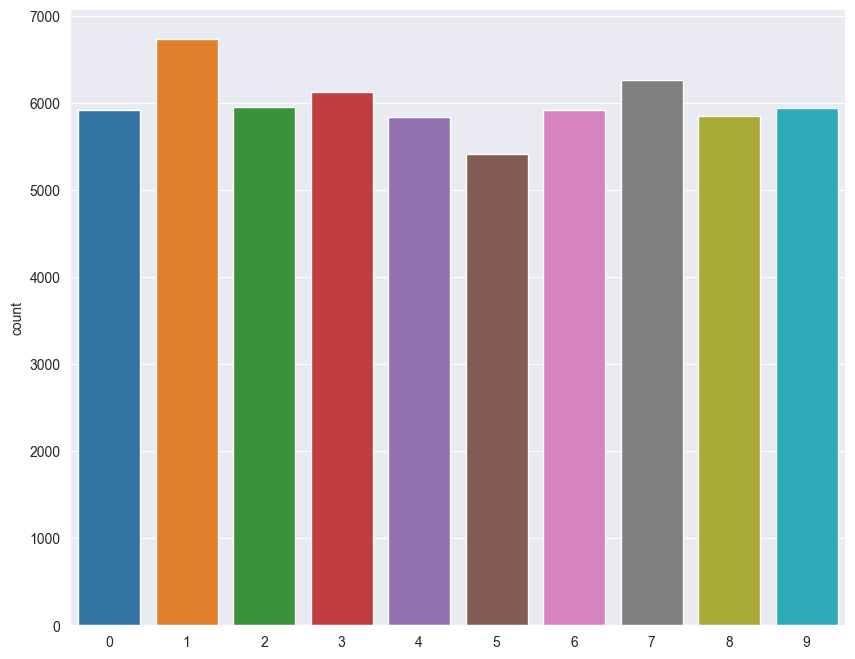

In [13]:
plt.figure(figsize = (10,8))
sns.countplot(x = y_train)

Displaying some images

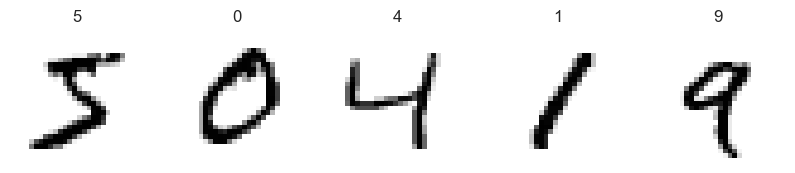

In [14]:
fig, axes = plt.subplots(ncols=5, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

Preprocessing the data

In [15]:
print('Training images shape: ',x_train.shape)
print('Testing images shape: ',x_test.shape)

Training images shape:  (60000, 28, 28)
Testing images shape:  (10000, 28, 28)


In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train=x_train/255.0
x_test=x_test/255.0
num_classes = 10

Model Building

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import BatchNormalization

In [18]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 26, 26, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)       

Training the model

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history=model.fit(x=x_train,
                 y=y_train,
                 validation_split=0.1,
                 epochs=5)

Epoch 1/5
1688/1688 [==============================] - 334s 197ms/step - loss: 0.2869 - accuracy: 0.9187 - val_loss: 0.0757 - val_accuracy: 0.9818
Epoch 2/5
1688/1688 [==============================] - 317s 187ms/step - loss: 0.1140 - accuracy: 0.9670 - val_loss: 0.0767 - val_accuracy: 0.9835
Epoch 3/5
1688/1688 [==============================] - 307s 182ms/step - loss: 0.0896 - accuracy: 0.9749 - val_loss: 0.0799 - val_accuracy: 0.9835
Epoch 4/5
1688/1688 [==============================] - 280s 166ms/step - loss: 0.0757 - accuracy: 0.9781 - val_loss: 0.0709 - val_accuracy: 0.9852
Epoch 5/5
1688/1688 [==============================] - 279s 165ms/step - loss: 0.0609 - accuracy: 0.9828 - val_loss: 0.1068 - val_accuracy: 0.9837


Model Evaluation

In [21]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 7s 23ms/step - loss: 0.0938 - accuracy: 0.9831
Test Loss 0.0937877744436264
Test Accuracy 0.9830999970436096


Validation matrix

In [22]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


313/313 [==============================] - 10s 26ms/step


Heatmap

Text(95.72222222222221, 0.5, 'Truth')

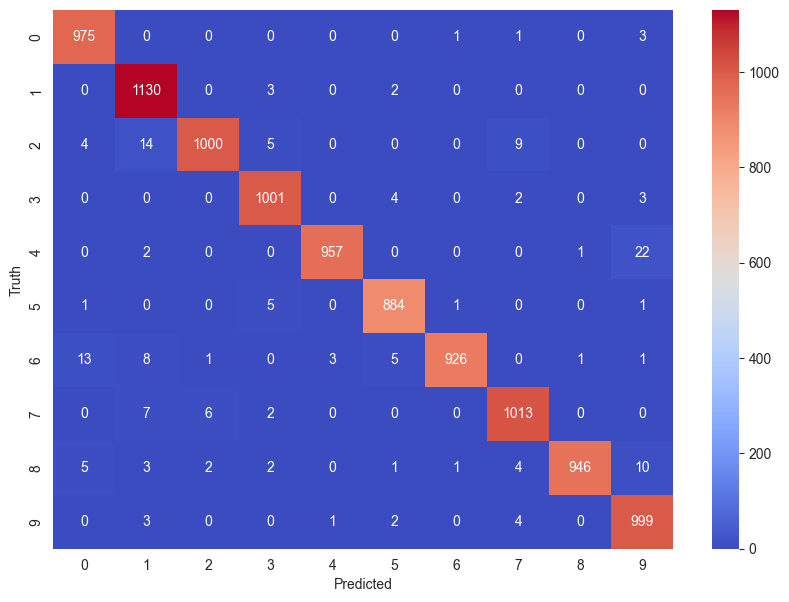

In [23]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Testing the model

313/313 [==============================] - 7s 23ms/step
Predicted Value:  1
Successful prediction


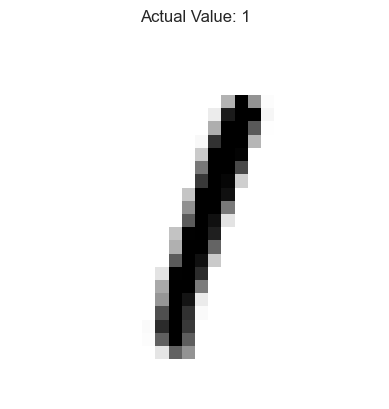

In [24]:
plt.imshow(x_test[5],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[5]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[5]))
if y_test[5] == (np.argmax(prediction[5])):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 7s 23ms/step
Predicted Value:  9
Successful prediction


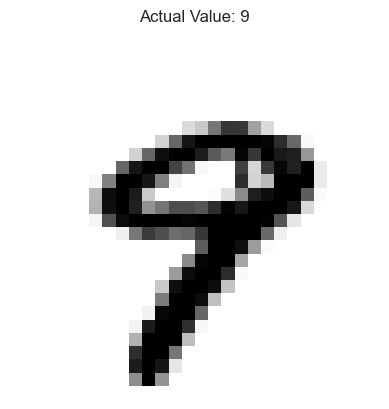

In [25]:
plt.imshow(x_test[9],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[9]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[9]))
if(y_test[9]==(np.argmax(prediction[9]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 7s 23ms/step
Predicted Value:  0
Successful prediction


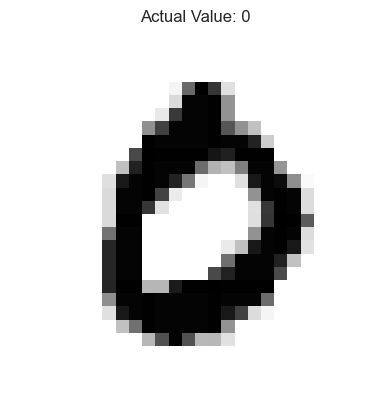

In [26]:
plt.imshow(x_test[3],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[3]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[3]))
if(y_test[3]==(np.argmax(prediction[3]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')